In [11]:
# import modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [12]:
# age               : Int
# education         : Categorical
# education level   : Int
# marital status    : Categorical
# Occupation        : Catagorical
# relationship      : Categorical
# race              : Categorical
# sex               : Categorical
# Investment profit : Int, but almost all 0
# Investment loss   : Int, but almost all 0
# hours per week    : Int
# native country    : Categorical
# income            : Conditional (e.g. <=50k, >50k)

In [13]:
df = pd.read_csv('data/survey.csv')
df = df.drop(columns=['Investment profit', 'Investment loss'])
# for col in df.columns:
#     if col not in ['age', 'education level', 'Investment profit', 'Investment loss', 'hours per week']:
#         print(f'{col}: {df[col].unique()}')
#         print()

In [14]:
# Encoding
LabelEncoders = {}
for col in df.columns:
    if col not in ['age', 'education level', 'Investment profit', 'Investment loss', 'hours per week']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        LabelEncoders[col] = le

In [15]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    print(f'k={k}, silhouette_score={silhouette_score(df, kmeans.labels_)}')

k=2, silhouette_score=0.3100433771899421
k=3, silhouette_score=0.32487832152079305
k=4, silhouette_score=0.2591376971991671
k=5, silhouette_score=0.33914233614300343
k=6, silhouette_score=0.28319314775666277
k=7, silhouette_score=0.22713268832763778
k=8, silhouette_score=0.29265790788793644
k=9, silhouette_score=0.24363474632102264


In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)

# submit = pd.DataFrame()
# submit['ID'] = df.index
# submit['Employment Type'] = kmeans.labels_
# submit.to_csv('submit.csv', index=False)

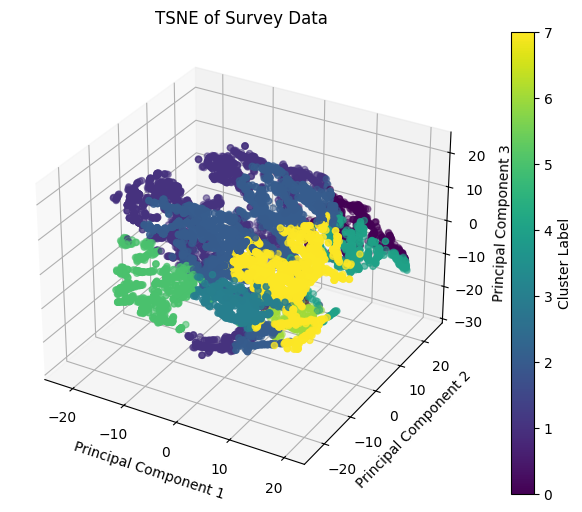

In [24]:
# # Perform PCA or TSNE
reducted = TSNE(n_components=3)
principal_components = reducted.fit_transform(df)

reducted_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# # 2D Plot
# plt.figure(figsize=(10, 6))
# plt.scatter(reducted_df['PC1'], reducted_df['PC2'], c=kmeans.labels_, cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('TSNE of Survey Data')
# plt.colorbar(label='Cluster Label')
# plt.show()

# # 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('TSNE of Survey Data')
scatter = ax.scatter(reducted_df['PC1'], reducted_df['PC2'], reducted_df['PC3'], c=kmeans.labels_, cmap='viridis')
fig.colorbar(scatter, label='Cluster Label')
plt.show()

In [27]:
testkmeans = KMeans(n_clusters=7)
testkmeans.fit(reducted_df)


submit = pd.DataFrame()
submit['ID'] = df.index
submit['Employment Type'] = testkmeans.labels_
submit.to_csv('submit.csv', index=False)

# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(reducted_df)
#     print(f'k={k}, silhouette_score={silhouette_score(reducted_df, kmeans.labels_)}')
